In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from binance_data_loader import BinanceDataLoader
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [2]:
data_loader = BinanceDataLoader(
    data_directory=r"C:\Users\USER\Documents\Binance_related\dailytickerdata2020",
    min_records=30,
    min_volume=1e5,
    start_date="2022-01-01",
    end_date=None
)

Loading Binance data from C:\Users\USER\Documents\Binance_related\dailytickerdata2020...
Found 534 USDT trading pairs
✓ BTCUSDT loaded successfully with 1353 records, avg volume: 352,340
Loaded 506 cryptocurrencies
Filtered 26 cryptocurrencies (insufficient data/volume)
Precomputing returns matrix (FAST numpy version)...
Building returns matrix for 506 tickers over 1353 dates...
Precomputed returns matrix shape: (1353, 506)
Date range: 2022-01-01 00:00:00 to 2025-09-14 00:00:00


In [3]:
# Get price data
df = data_loader.get_price_matrix()
print(f"Price data shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
df.head()

Price data shape: (1353, 506)
Date range: 2022-01-01 00:00:00 to 2025-09-14 00:00:00


,1000000BOBUSDT,1000000MOGUSDT,1000BONKUSDT,1000CATUSDT,1000CHEEMSUSDT,1000FLOKIUSDT,1000LUNCUSDT,1000PEPEUSDT,1000RATSUSDT,1000SATSUSDT,...,ZENUSDT,ZEREBROUSDT,ZETAUSDT,ZILUSDT,ZKJUSDT,ZKUSDT,ZORAUSDT,ZRCUSDT,ZROUSDT,ZRXUSDT
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.926,NaN,NaN,0.07662,NaN,NaN,NaN,NaN,NaN,0.8735
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.096,NaN,NaN,0.07707,NaN,NaN,NaN,NaN,NaN,0.8884
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.473,NaN,NaN,0.07439,NaN,NaN,NaN,NaN,NaN,0.9405
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.440,NaN,NaN,0.07110,NaN,NaN,NaN,NaN,NaN,0.8894
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.293,NaN,NaN,0.06663,NaN,NaN,NaN,NaN,NaN,0.8260


In [4]:
# Calculate daily returns
rets = df.pct_change().fillna(0)
print(f"Returns data shape: {rets.shape}")
rets.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2472049915.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rets = df.pct_change().fillna(0)


Returns data shape: (1353, 506)


,1000000BOBUSDT,1000000MOGUSDT,1000BONKUSDT,1000CATUSDT,1000CHEEMSUSDT,1000FLOKIUSDT,1000LUNCUSDT,1000PEPEUSDT,1000RATSUSDT,1000SATSUSDT,...,ZENUSDT,ZEREBROUSDT,ZETAUSDT,ZILUSDT,ZKJUSDT,ZKUSDT,ZORAUSDT,ZRCUSDT,ZROUSDT,ZRXUSDT
2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2022-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018302,0.0,0.0,0.005873,0.0,0.0,0.0,0.0,0.0,0.017058
2022-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.024932,0.0,0.0,-0.034774,0.0,0.0,0.0,0.0,0.0,0.058645
2022-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015235,0.0,0.0,-0.044226,0.0,0.0,0.0,0.0,0.0,-0.054333
2022-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.064354,0.0,0.0,-0.062869,0.0,0.0,0.0,0.0,0.0,-0.071284


In [5]:
# Volatility-Return Relationship Analysis
# Get volume data for daily selection
volume_data = {}
for ticker in data_loader.get_universe():
  ticker_data = data_loader._crypto_universe[ticker]['data']
  volume_data[ticker] = ticker_data['volume'].reindex(df.index)

volume_matrix = pd.DataFrame(volume_data, index=df.index)

# For analysis, we'll pick assets that are consistently in top volume
# Count how often each asset is in top 20 daily volume
top_volume_count = {}
for date in volume_matrix.index:
  daily_volumes = volume_matrix.loc[date].dropna()
  if len(daily_volumes) > 0:
      top_20_daily = daily_volumes.nlargest(20).index
      for asset in top_20_daily:
          top_volume_count[asset] = top_volume_count.get(asset, 0) + 1

# Select assets that appear in top 20 volume most frequently
most_frequent_top_volume = sorted(top_volume_count.items(), key=lambda x: x[1], reverse=True)[:10]
selected_assets = [asset[0] for asset in most_frequent_top_volume]
print(f"Analyzing assets most frequently in top volume: {selected_assets}")
print(f"Days in top 20 volume: {[count for _, count in most_frequent_top_volume]}")

# Filter dataframe to selected assets
df_selected = df[selected_assets]
rets_selected = rets[selected_assets]

Analyzing assets most frequently in top volume: ['1000SHIBUSDT', 'DOGEUSDT', 'DENTUSDT', 'HOTUSDT', 'SPELLUSDT', 'GALAUSDT', 'RSRUSDT', 'REEFUSDT', 'LINAUSDT', '1000PEPEUSDT']
Days in top 20 volume: [1345, 1210, 1158, 1132, 1084, 1046, 971, 968, 948, 864]


Calculating volatility-return relationships...


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:13<00:05,  1.95s/it]C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2667173478.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2667173478.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2667173478.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is

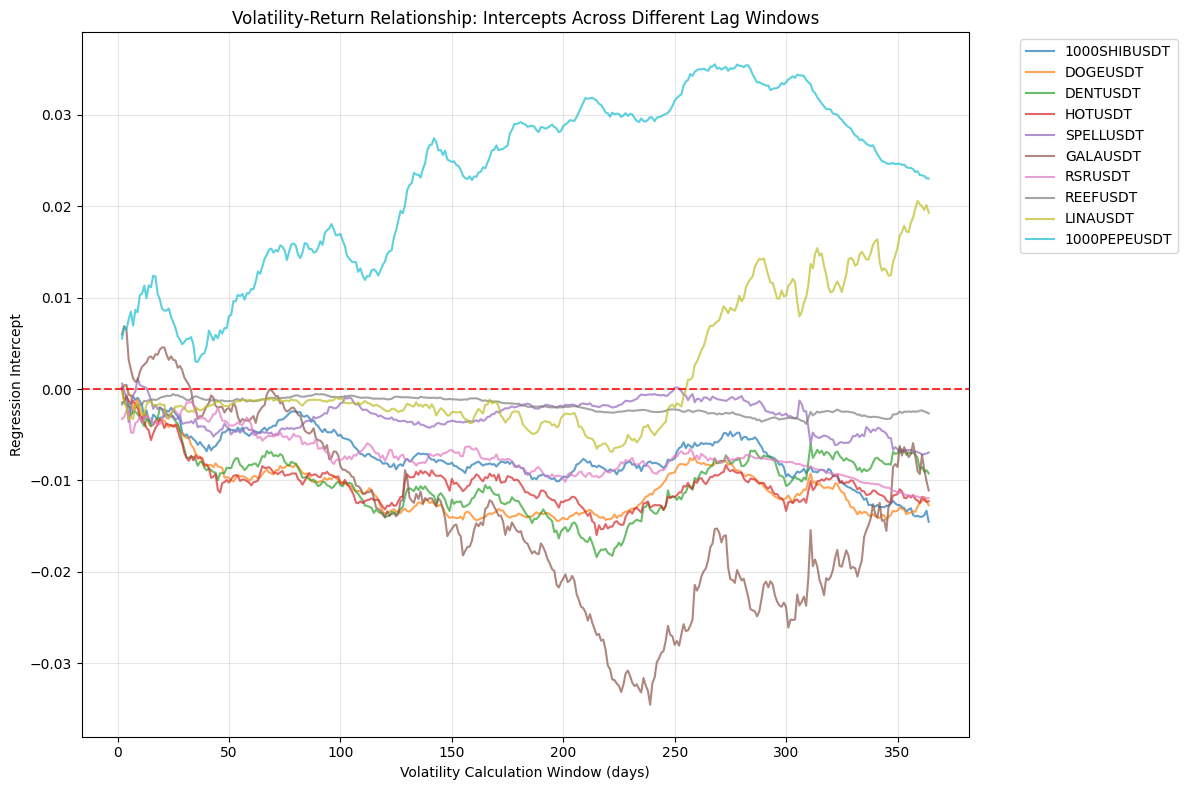

In [6]:
# Plot intercepts: Lag Return Vol vs Next Day Return
plt.figure(figsize=(12,8))

print("Calculating volatility-return relationships...")
for column in tqdm(df_selected.columns):
    intercepts = []
    slopes = []

    for lag in range(2, 365):
        try:
            # Calculate rolling volatility
            vol = rets_selected[1:][column].rolling(window=lag).std().iloc[lag:-1]
            
            # Calculate next day returns (forward-looking)
            next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
            
            # Ensure same length and remove NaN values
            min_len = min(len(vol), len(next_day_rets))
            vol_clean = vol.iloc[:min_len].dropna()
            ret_clean = next_day_rets.iloc[:min_len].dropna()
            
            # Align indices
            common_idx = vol_clean.index.intersection(ret_clean.index)
            if len(common_idx) < 30:  # Need minimum observations
                intercepts.append(np.nan)
                slopes.append(np.nan)
                continue
                
            vol_aligned = vol_clean[common_idx]
            ret_aligned = ret_clean[common_idx]
            
            # Linear regression
            reg = LinearRegression().fit(np.array(vol_aligned).reshape(-1,1), np.array(ret_aligned))
            
            intercepts.append(reg.intercept_)
            slopes.append(reg.coef_[0])
            
        except Exception as e:
            intercepts.append(np.nan)
            slopes.append(np.nan)

    # Plot intercepts
    plt.plot(range(2, 365), intercepts, label=column, alpha=0.7)

plt.axhline(0, color='r', linestyle='--', alpha=0.8)
plt.title("Volatility-Return Relationship: Intercepts Across Different Lag Windows")
plt.xlabel("Volatility Calculation Window (days)")
plt.ylabel("Regression Intercept")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Plotting volatility coefficients...


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:14<00:06,  2.07s/it]C:\Users\USER\AppData\Local\Temp\ipykernel_24032\1917445998.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
C:\Users\USER\AppData\Local\Temp\ipykernel_24032\1917445998.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
C:\Users\USER\AppData\Local\Temp\ipykernel_24032\1917445998.py:15: FutureWarning: The default fill_method='pad' in Series.pct_change is

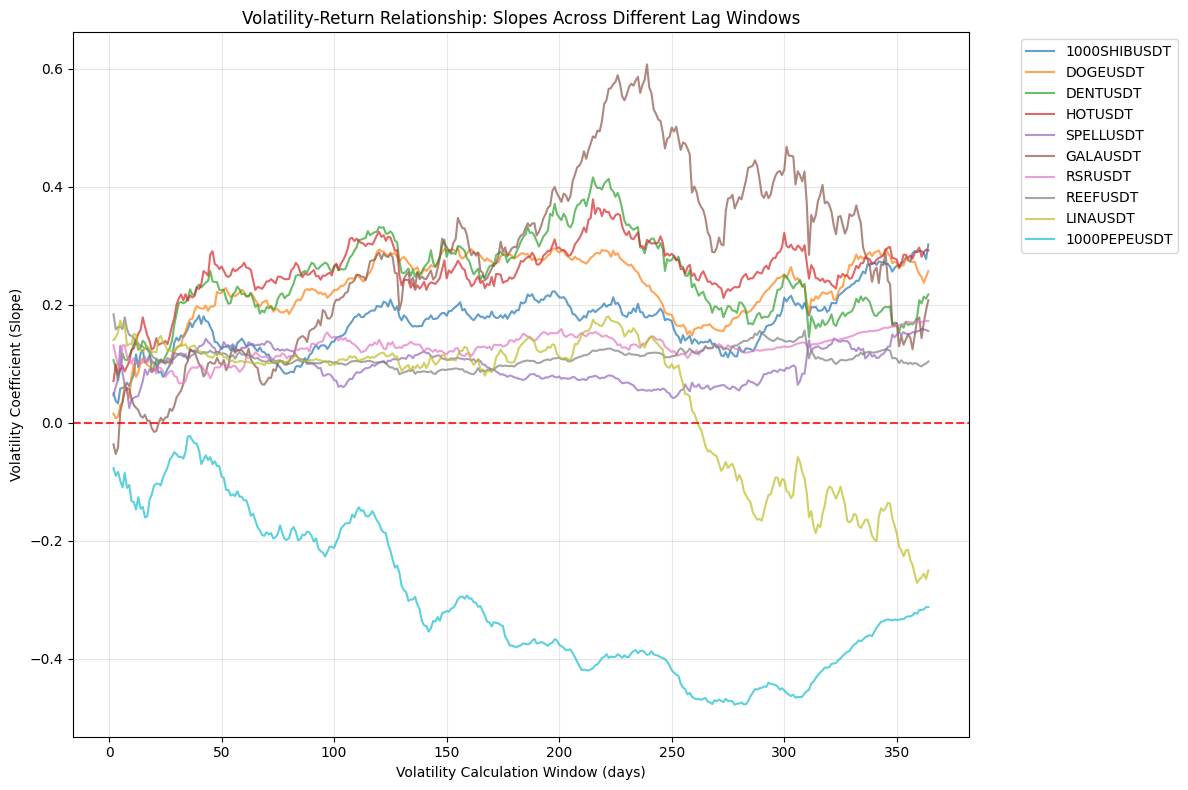

In [7]:
# Plot slopes: Volatility coefficient in predicting next-day returns
plt.figure(figsize=(12,8))

print("Plotting volatility coefficients...")
for column in tqdm(df_selected.columns):
    intercepts = []
    slopes = []

    for lag in range(2, 365):
        try:
            # Calculate rolling volatility
            vol = rets_selected[1:][column].rolling(window=lag).std().iloc[lag:-1]
            
            # Calculate next day returns (forward-looking)
            next_day_rets = df_selected[column].pct_change(-1)[lag+1:-1]
            
            # Ensure same length and remove NaN values
            min_len = min(len(vol), len(next_day_rets))
            vol_clean = vol.iloc[:min_len].dropna()
            ret_clean = next_day_rets.iloc[:min_len].dropna()
            
            # Align indices
            common_idx = vol_clean.index.intersection(ret_clean.index)
            if len(common_idx) < 30:  # Need minimum observations
                intercepts.append(np.nan)
                slopes.append(np.nan)
                continue
                
            vol_aligned = vol_clean[common_idx]
            ret_aligned = ret_clean[common_idx]
            
            # Linear regression
            reg = LinearRegression().fit(np.array(vol_aligned).reshape(-1,1), np.array(ret_aligned))
            
            intercepts.append(reg.intercept_)
            slopes.append(reg.coef_[0])
            
        except Exception as e:
            intercepts.append(np.nan)
            slopes.append(np.nan)

    # Plot slopes
    plt.plot(range(2, 365), slopes, label=column, alpha=0.7)

plt.axhline(0, color='r', linestyle='--', alpha=0.8)
plt.title("Volatility-Return Relationship: Slopes Across Different Lag Windows")
plt.xlabel("Volatility Calculation Window (days)")
plt.ylabel("Volatility Coefficient (Slope)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Testing volatility strategy with different lookback windows
Strategy: Long High Vol, Short Low Vol with 20-day rolling volume filtering
Testing 9 different volatility windows with 20-day rolling volume...


Volatility windows:   0%|                                                                        | 0/9 [00:00<?, ?it/s]


Testing 30-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  11%|███████                                                         | 1/9 [00:08<01:04,  8.09s/it]

  Return: -70.4%, Sharpe: -0.57, Max DD: -71.8%

Testing 60-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  22%|██████████████▏                                                 | 2/9 [00:15<00:53,  7.71s/it]

  Return: -71.8%, Sharpe: -0.69, Max DD: -74.1%

Testing 90-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  33%|█████████████████████▎                                          | 3/9 [00:22<00:44,  7.41s/it]

  Return: -70.9%, Sharpe: -0.70, Max DD: -77.0%

Testing 120-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  44%|████████████████████████████▍                                   | 4/9 [00:29<00:35,  7.17s/it]

  Return: -70.9%, Sharpe: -0.77, Max DD: -78.4%

Testing 150-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  56%|███████████████████████████████████▌                            | 5/9 [00:36<00:28,  7.02s/it]

  Return: -68.1%, Sharpe: -0.73, Max DD: -76.9%

Testing 180-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  67%|██████████████████████████████████████████▋                     | 6/9 [00:42<00:20,  6.91s/it]

  Return: -72.0%, Sharpe: -0.90, Max DD: -79.1%

Testing 220-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  78%|█████████████████████████████████████████████████▊              | 7/9 [00:49<00:13,  6.76s/it]

  Return: -67.1%, Sharpe: -0.83, Max DD: -76.6%

Testing 252-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows:  89%|████████████████████████████████████████████████████████▉       | 8/9 [00:55<00:06,  6.59s/it]

  Return: -68.5%, Sharpe: -1.24, Max DD: -70.4%

Testing 300-day volatility window...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\2814879011.py:31: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Volatility windows: 100%|████████████████████████████████████████████████████████████████| 9/9 [01:01<00:00,  6.85s/it]

  Return: -56.7%, Sharpe: -0.92, Max DD: -58.3%

VOLATILITY WINDOW OPTIMIZATION RESULTS (20-Day Rolling Volume)
   vol_window  total_return  annualized_vol  sharpe_ratio  max_drawdown  \
0          30       -0.7043          0.3209       -0.5712       -0.7181   
1          60       -0.7177          0.2981       -0.6863       -0.7414   
2          90       -0.7092          0.2939       -0.7004       -0.7695   
3         120       -0.7087          0.2790       -0.7726       -0.7837   
4         150       -0.6806          0.2787       -0.7272       -0.7691   
5         180       -0.7202          0.2669       -0.9010       -0.7908   
6         220       -0.6713          0.2598       -0.8322       -0.7658   
7         252       -0.6852          0.1983       -1.2357       -0.7043   
8         300       -0.5672          0.1977       -0.9158       -0.5830   

   num_trades  final_equity  
0        1322        0.2957  
1        1292        0.2823  
2        1262        0.2908  
3        1232    

KeyError: '30.0d'

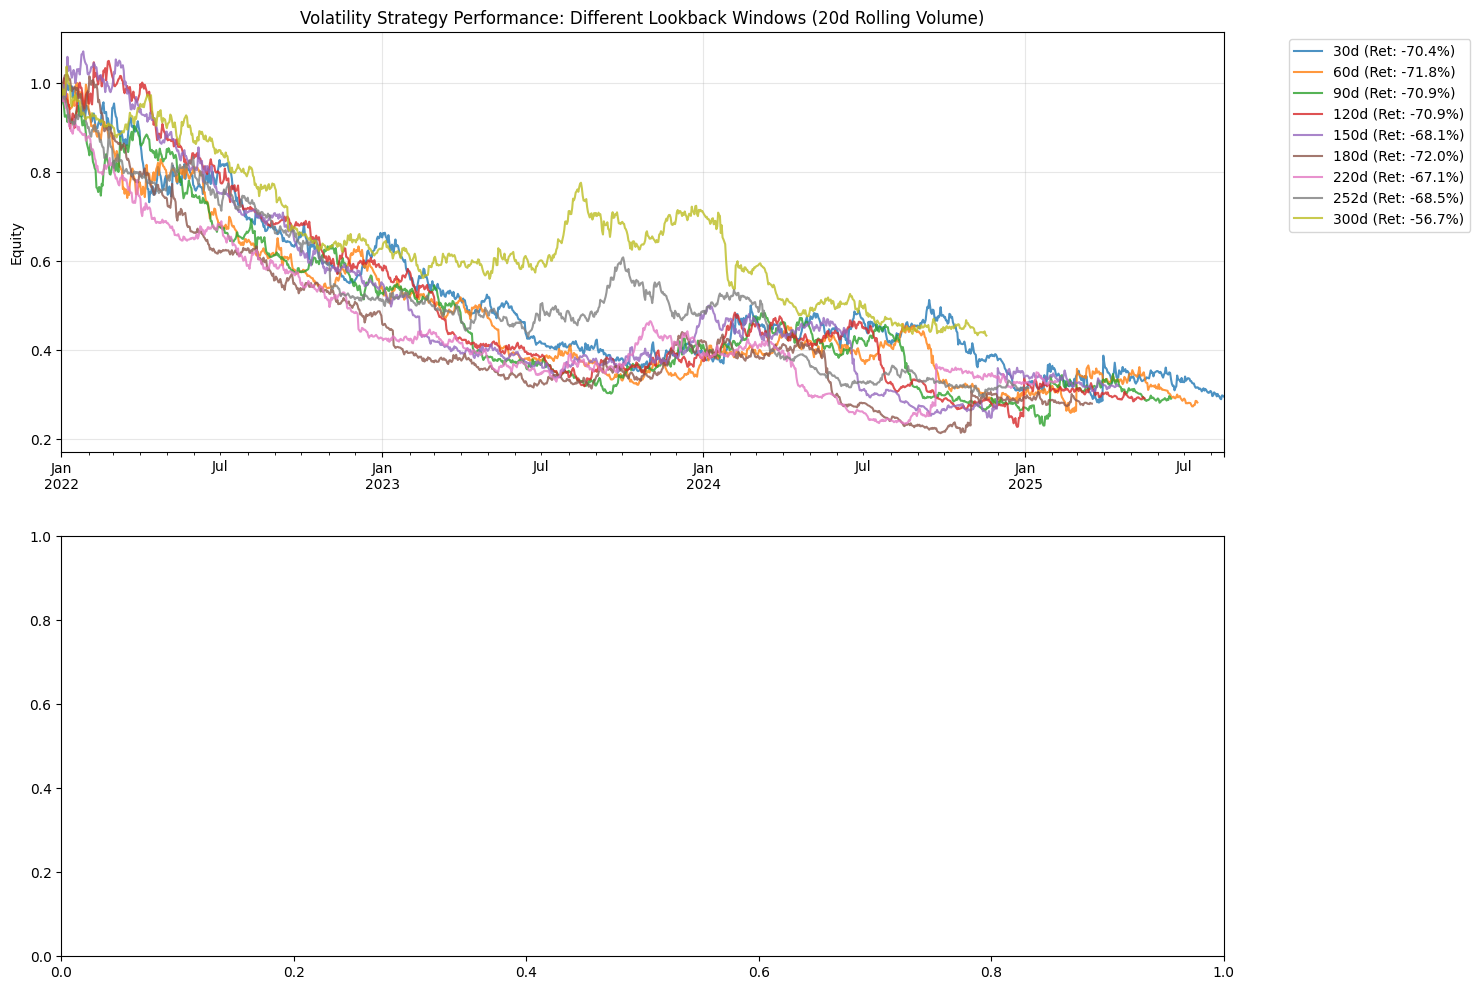

In [8]:
# Volatility Strategy Optimization: Loop through different lookback windows
print("Testing volatility strategy with different lookback windows")
print("Strategy: Long High Vol, Short Low Vol with 20-day rolling volume filtering")

# Parameters to test
vol_windows = [30, 60, 90, 120, 150, 180, 220, 252, 300]  # Different volatility lookback periods
top_n_volume = 50  # Top volume universe each day
k_positions = 10  # Number of positions per side (long/short)

# Get volume matrix with 20-day rolling average
volume_data = {}
for ticker in data_loader.get_universe():
    ticker_data = data_loader._crypto_universe[ticker]['data']
    volume_data[ticker] = ticker_data['volume'].reindex(df.index)

volume_matrix = pd.DataFrame(volume_data, index=df.index)

# Calculate 20-day rolling average volume
rolling_volume_matrix = volume_matrix.rolling(window=20, min_periods=10).mean()

# Store results for each volatility window
results = []
equity_curves = {}

print(f"Testing {len(vol_windows)} different volatility windows with 20-day rolling volume...")

for vol_window in tqdm(vol_windows, desc="Volatility windows"):
    print(f"\nTesting {vol_window}-day volatility window...")
    
    # Calculate rolling volatility for this window
    volatility_matrix = df.pct_change().rolling(vol_window).std()
    
    # Backtest the strategy
    equity = [1.0]
    trade_count = 0
    
    for i in range(vol_window, len(df) - 1):
        current_date = df.index[i]
        
        # Step 1: Get top volume universe using 20-day rolling average
        current_volumes = rolling_volume_matrix.iloc[i].dropna()
        if len(current_volumes) < top_n_volume:
            equity.append(equity[-1])
            continue
        
        top_volume_tickers = current_volumes.nlargest(top_n_volume).index
        
        # Step 2: Get volatilities for volume-filtered universe
        current_volatilities = volatility_matrix.iloc[i][top_volume_tickers].dropna()
        
        if len(current_volatilities) < k_positions * 2:
            equity.append(equity[-1])
            continue
        
        # Step 3: Select highest and lowest volatility assets
        high_vol_assets = current_volatilities.nlargest(k_positions).index  # Long these
        low_vol_assets = current_volatilities.nsmallest(k_positions).index  # Short these
        
        # Step 4: Calculate next-day returns
        long_returns = []
        short_returns = []
        
        # Long high volatility assets
        for asset in high_vol_assets:
            p0 = df[asset].iat[i]
            p1 = df[asset].iat[i+1]
            if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
                ret = (p1 - p0) / p0
                long_returns.append(ret)
        
        # Short low volatility assets  
        for asset in low_vol_assets:
            p0 = df[asset].iat[i]
            p1 = df[asset].iat[i+1]
            if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
                ret = (p1 - p0) / p0
                short_returns.append(ret)
        
        # Step 5: Calculate portfolio return
        if len(long_returns) > 0 and len(short_returns) > 0:
            avg_long_return = np.mean(long_returns)
            avg_short_return = np.mean(short_returns)
            
            # Portfolio: 50% long high vol, 50% short low vol
            portfolio_return = 0.5 * avg_long_return - 0.5 * avg_short_return - 0.0005  # 5bps fees
            equity.append(equity[-1] * (1 + portfolio_return))
            trade_count += 1
        else:
            equity.append(equity[-1])
    
    # Store equity curve
    equity_series = pd.Series(equity, index=df.index[:len(equity)])
    equity_curves[f"{vol_window}d"] = equity_series
    
    # Calculate performance metrics
    total_return = equity_series.iloc[-1] - 1
    daily_returns = equity_series.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    sharpe = daily_returns.mean() / daily_returns.std() * np.sqrt(252) if daily_returns.std() > 0 else 0
    max_dd = (equity_series / equity_series.cummax() - 1).min()
    
    # Store results
    results.append({
        'vol_window': vol_window,
        'total_return': total_return,
        'annualized_vol': volatility,
        'sharpe_ratio': sharpe,
        'max_drawdown': max_dd,
        'num_trades': trade_count,
        'final_equity': equity_series.iloc[-1]
    })
    
    print(f"  Return: {total_return:.1%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.1%}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

print(f"\n" + "="*70)
print("VOLATILITY WINDOW OPTIMIZATION RESULTS (20-Day Rolling Volume)")
print("="*70)
print(results_df.round(4))

print(f"\nTop 5 strategies by Sharpe ratio:")
top_sharpe = results_df.nlargest(5, 'sharpe_ratio')[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']]
print(top_sharpe.round(4))

print(f"\nTop 5 strategies by total return:")
top_return = results_df.nlargest(5, 'total_return')[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']]
print(top_return.round(4))

# Plot comparison of all volatility windows
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot all equity curves
for vol_window in vol_windows:
    label = f"{vol_window}d (Ret: {results_df[results_df['vol_window']==vol_window]['total_return'].iloc[0]:.1%})"
    equity_curves[f"{vol_window}d"].plot(ax=ax1, label=label, alpha=0.8)

ax1.set_title("Volatility Strategy Performance: Different Lookback Windows (20d Rolling Volume)")
ax1.set_ylabel("Equity")
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot top 3 strategies vs BTC
btc_cumret = (1 + df["BTCUSDT"].pct_change().fillna(0)).cumprod()
top_3_sharpe = results_df.nlargest(3, 'sharpe_ratio')

for _, row in top_3_sharpe.iterrows():
    vol_window = row['vol_window']
    label = f"{vol_window}d Vol (Sharpe: {row['sharpe_ratio']:.2f})"
    equity_curves[f"{vol_window}d"].plot(ax=ax2, label=label, linewidth=2)

btc_aligned = btc_cumret.reindex(equity_curves[f"{vol_windows[0]}d"].index).fillna(method='ffill')
btc_aligned.plot(ax=ax2, label=f"BTC Buy & Hold", linewidth=2, color='red')

ax2.set_title("Top 3 Volatility Strategies vs BTC (20d Rolling Volume)")
ax2.set_ylabel("Cumulative Return")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Performance heatmap
plt.figure(figsize=(12, 8))
metrics_matrix = results_df.set_index('vol_window')[['total_return', 'sharpe_ratio', 'max_drawdown']].T

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Total Return
im1 = axes[0].imshow(metrics_matrix.loc[['total_return']].values, cmap='RdYlGn', aspect='auto')
axes[0].set_title('Total Return')
axes[0].set_xticks(range(len(vol_windows)))
axes[0].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[0].set_yticks([0])
axes[0].set_yticklabels(['Return'])
plt.colorbar(im1, ax=axes[0])

# Sharpe Ratio  
im2 = axes[1].imshow(metrics_matrix.loc[['sharpe_ratio']].values, cmap='RdYlGn', aspect='auto')
axes[1].set_title('Sharpe Ratio')
axes[1].set_xticks(range(len(vol_windows)))
axes[1].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[1].set_yticks([0])
axes[1].set_yticklabels(['Sharpe'])
plt.colorbar(im2, ax=axes[1])

# Max Drawdown (negative is better, so reverse colormap)
im3 = axes[2].imshow(metrics_matrix.loc[['max_drawdown']].values, cmap='RdYlGn_r', aspect='auto')
axes[2].set_title('Max Drawdown')
axes[2].set_xticks(range(len(vol_windows)))
axes[2].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[2].set_yticks([0])
axes[2].set_yticklabels(['Max DD'])
plt.colorbar(im3, ax=axes[2])

plt.suptitle('Volatility Strategy Performance: 20-Day Rolling Volume Filter')
plt.tight_layout()
plt.show()

In [9]:
# OPPOSITE STRATEGY: Long Low Vol, Short High Vol
print("Testing OPPOSITE volatility strategy with different lookback windows")
print("Strategy: Long Low Vol, Short High Vol (Low Volatility Anomaly) with 20-day rolling volume")

# Same parameters as before
vol_windows = [30, 60, 90, 120, 150, 180, 220, 252, 300]
top_n_volume = 50
k_positions = 10

# Store results for opposite strategy
opposite_results = []
opposite_equity_curves = {}

print(f"Testing {len(vol_windows)} different volatility windows for OPPOSITE strategy with 20-day rolling volume...")

for vol_window in tqdm(vol_windows, desc="Opposite Strategy - Vol windows"):
    print(f"\nTesting {vol_window}-day volatility window (Low Vol Long, High Vol Short)...")
    
    # Calculate rolling volatility for this window
    volatility_matrix = df.pct_change().rolling(vol_window).std()
    
    # Backtest the OPPOSITE strategy
    equity = [1.0]
    trade_count = 0
    
    for i in range(vol_window, len(df) - 1):
        current_date = df.index[i]
        
        # Step 1: Get top volume universe using 20-day rolling average
        current_volumes = rolling_volume_matrix.iloc[i].dropna()
        if len(current_volumes) < top_n_volume:
            equity.append(equity[-1])
            continue
        
        top_volume_tickers = current_volumes.nlargest(top_n_volume).index
        
        # Step 2: Get volatilities for volume-filtered universe
        current_volatilities = volatility_matrix.iloc[i][top_volume_tickers].dropna()
        
        if len(current_volatilities) < k_positions * 2:
            equity.append(equity[-1])
            continue
        
        # Step 3: OPPOSITE SELECTION - Long LOW vol, Short HIGH vol
        low_vol_assets = current_volatilities.nsmallest(k_positions).index   # Long these (LOW vol)
        high_vol_assets = current_volatilities.nlargest(k_positions).index   # Short these (HIGH vol)
        
        # Step 4: Calculate next-day returns
        long_returns = []
        short_returns = []
        
        # Long LOW volatility assets
        for asset in low_vol_assets:
            p0 = df[asset].iat[i]
            p1 = df[asset].iat[i+1]
            if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
                ret = (p1 - p0) / p0
                long_returns.append(ret)
        
        # Short HIGH volatility assets  
        for asset in high_vol_assets:
            p0 = df[asset].iat[i]
            p1 = df[asset].iat[i+1]
            if np.isfinite(p0) and p0 != 0 and np.isfinite(p1):
                ret = (p1 - p0) / p0
                short_returns.append(ret)
        
        # Step 5: Calculate portfolio return
        if len(long_returns) > 0 and len(short_returns) > 0:
            avg_long_return = np.mean(long_returns)
            avg_short_return = np.mean(short_returns)
            
            # Portfolio: 50% long low vol, 50% short high vol
            portfolio_return = 0.5 * avg_long_return - 0.5 * avg_short_return - 0.0005  # 5bps fees
            equity.append(equity[-1] * (1 + portfolio_return))
            trade_count += 1
        else:
            equity.append(equity[-1])
    
    # Store equity curve
    equity_series = pd.Series(equity, index=df.index[:len(equity)])
    opposite_equity_curves[f"{vol_window}d"] = equity_series
    
    # Calculate performance metrics
    total_return = equity_series.iloc[-1] - 1
    daily_returns = equity_series.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    sharpe = daily_returns.mean() / daily_returns.std() * np.sqrt(252) if daily_returns.std() > 0 else 0
    max_dd = (equity_series / equity_series.cummax() - 1).min()
    
    # Store results
    opposite_results.append({
        'vol_window': vol_window,
        'total_return': total_return,
        'annualized_vol': volatility,
        'sharpe_ratio': sharpe,
        'max_drawdown': max_dd,
        'num_trades': trade_count,
        'final_equity': equity_series.iloc[-1]
    })
    
    print(f"  Return: {total_return:.1%}, Sharpe: {sharpe:.2f}, Max DD: {max_dd:.1%}")

# Convert results to DataFrame
opposite_results_df = pd.DataFrame(opposite_results)

print(f"\n" + "="*70)
print("OPPOSITE STRATEGY (Long Low Vol, Short High Vol) RESULTS - 20d Rolling Volume")
print("="*70)
print(opposite_results_df.round(4))

print(f"\nTop 5 OPPOSITE strategies by Sharpe ratio:")
top_opposite_sharpe = opposite_results_df.nlargest(5, 'sharpe_ratio')[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']]
print(top_opposite_sharpe.round(4))

print(f"\nTop 5 OPPOSITE strategies by total return:")
top_opposite_return = opposite_results_df.nlargest(5, 'total_return')[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']]
print(top_opposite_return.round(4))

Testing OPPOSITE volatility strategy with different lookback windows
Strategy: Long Low Vol, Short High Vol (Low Volatility Anomaly) with 20-day rolling volume
Testing 9 different volatility windows for OPPOSITE strategy with 20-day rolling volume...


Opposite Strategy - Vol windows:   0%|                                                           | 0/9 [00:00<?, ?it/s]


Testing 30-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  11%|█████▋                                             | 1/9 [00:07<01:02,  7.86s/it]

  Return: -48.0%, Sharpe: -0.21, Max DD: -64.1%

Testing 60-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  22%|███████████▎                                       | 2/9 [00:15<00:53,  7.60s/it]

  Return: -38.9%, Sharpe: -0.16, Max DD: -63.7%

Testing 90-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  33%|█████████████████                                  | 3/9 [00:22<00:44,  7.35s/it]

  Return: -37.4%, Sharpe: -0.16, Max DD: -64.1%

Testing 120-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  44%|██████████████████████▋                            | 4/9 [00:29<00:36,  7.37s/it]

  Return: -32.1%, Sharpe: -0.13, Max DD: -58.6%

Testing 150-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  56%|████████████████████████████▎                      | 5/9 [00:36<00:28,  7.07s/it]

  Return: -35.5%, Sharpe: -0.18, Max DD: -59.7%

Testing 180-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  67%|██████████████████████████████████                 | 6/9 [00:42<00:20,  6.90s/it]

  Return: -21.1%, Sharpe: -0.04, Max DD: -56.7%

Testing 220-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  78%|███████████████████████████████████████▋           | 7/9 [00:49<00:13,  6.88s/it]

  Return: -28.1%, Sharpe: -0.14, Max DD: -57.5%

Testing 252-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows:  89%|█████████████████████████████████████████████▎     | 8/9 [00:55<00:06,  6.68s/it]

  Return: -11.0%, Sharpe: -0.04, Max DD: -42.7%

Testing 300-day volatility window (Low Vol Long, High Vol Short)...


C:\Users\USER\AppData\Local\Temp\ipykernel_24032\3630609633.py:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility_matrix = df.pct_change().rolling(vol_window).std()
Opposite Strategy - Vol windows: 100%|███████████████████████████████████████████████████| 9/9 [01:02<00:00,  6.92s/it]

  Return: -31.5%, Sharpe: -0.36, Max DD: -48.0%

OPPOSITE STRATEGY (Long Low Vol, Short High Vol) RESULTS - 20d Rolling Volume
   vol_window  total_return  annualized_vol  sharpe_ratio  max_drawdown  \
0          30       -0.4797          0.3209       -0.2142       -0.6409   
1          60       -0.3890          0.2981       -0.1591       -0.6370   
2          90       -0.3743          0.2939       -0.1571       -0.6412   
3         120       -0.3213          0.2790       -0.1305       -0.5860   
4         150       -0.3553          0.2787       -0.1771       -0.5973   
5         180       -0.2113          0.2669       -0.0433       -0.5670   
6         220       -0.2814          0.2598       -0.1376       -0.5755   
7         252       -0.1098          0.1983       -0.0350       -0.4265   
8         300       -0.3148          0.1977       -0.3587       -0.4802   

   num_trades  final_equity  
0        1322        0.5203  
1        1292        0.6110  
2        1262        0.6257  
3 


STRATEGY COMPARISON: High Vol Long vs Low Vol Long
Performance Comparison (Positive = High Vol Long is better):
   vol_window_high_vol_long  return_diff  sharpe_diff
0                        30      -0.2246      -0.3570
1                        60      -0.3286      -0.5272
2                        90      -0.3349      -0.5432
3                       120      -0.3874      -0.6420
4                       150      -0.3253      -0.5501
5                       180      -0.5089      -0.8577
6                       220      -0.3900      -0.6945
7                       252      -0.5754      -1.2007
8                       300      -0.2524      -0.5571


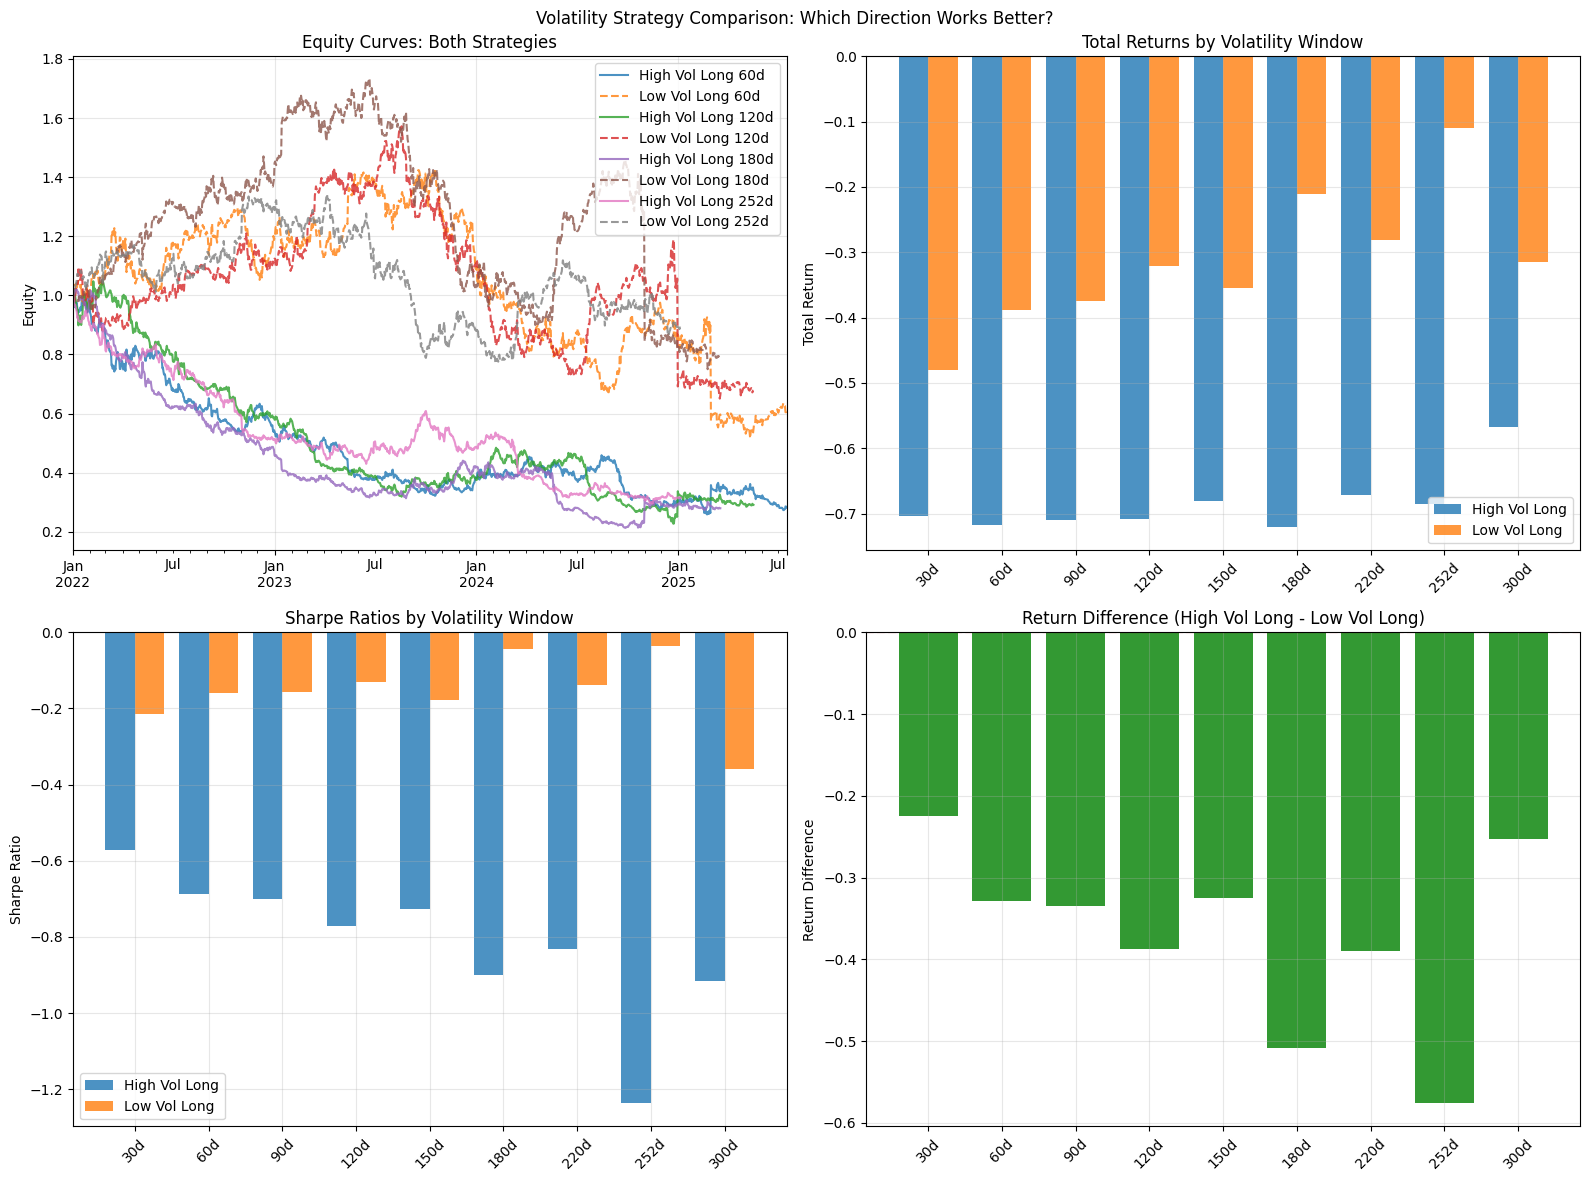


BEST PERFORMING STRATEGIES:
--------------------------------------------------
Best High Vol Long Strategy:
  Window: 30.0 days
  Return: -70.4%
  Sharpe: -0.57
  Max DD: -71.8%

Best Low Vol Long Strategy:
  Window: 252.0 days
  Return: -11.0%
  Sharpe: -0.04
  Max DD: -42.7%

OVERALL VERDICT:
High Vol Long wins in 0/9 windows
Low Vol Long wins in 9/9 windows
→ LOW VOLATILITY LONG strategy generally performs better
→ This suggests: Low vol assets tend to have higher risk-adjusted returns


In [10]:
# COMPARISON: Original vs Opposite Strategy
print("\n" + "="*80)
print("STRATEGY COMPARISON: High Vol Long vs Low Vol Long")
print("="*80)

# Side-by-side comparison
comparison_df = pd.merge(
    results_df[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']].add_suffix('_high_vol_long'),
    opposite_results_df[['vol_window', 'total_return', 'sharpe_ratio', 'max_drawdown']].add_suffix('_low_vol_long'),
    left_on='vol_window_high_vol_long', 
    right_on='vol_window_low_vol_long'
)

# Calculate differences
comparison_df['return_diff'] = comparison_df['total_return_high_vol_long'] - comparison_df['total_return_low_vol_long']
comparison_df['sharpe_diff'] = comparison_df['sharpe_ratio_high_vol_long'] - comparison_df['sharpe_ratio_low_vol_long']

print("Performance Comparison (Positive = High Vol Long is better):")
print(comparison_df[['vol_window_high_vol_long', 'return_diff', 'sharpe_diff']].round(4))

# Plot both strategies together
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Equity curves comparison
for vol_window in [60, 120, 180, 252]:  # Selected windows for clarity
    if f"{vol_window}d" in equity_curves and f"{vol_window}d" in opposite_equity_curves:
        equity_curves[f"{vol_window}d"].plot(ax=axes[0,0], label=f"High Vol Long {vol_window}d", alpha=0.8)
        opposite_equity_curves[f"{vol_window}d"].plot(ax=axes[0,0], label=f"Low Vol Long {vol_window}d", linestyle='--', alpha=0.8)

axes[0,0].set_title("Equity Curves: Both Strategies")
axes[0,0].set_ylabel("Equity")
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Return comparison by volatility window
axes[0,1].bar(np.arange(len(vol_windows)) - 0.2, results_df['total_return'], 0.4, 
              label='High Vol Long', alpha=0.8)
axes[0,1].bar(np.arange(len(vol_windows)) + 0.2, opposite_results_df['total_return'], 0.4,
              label='Low Vol Long', alpha=0.8)
axes[0,1].set_title("Total Returns by Volatility Window")
axes[0,1].set_ylabel("Total Return")
axes[0,1].set_xticks(range(len(vol_windows)))
axes[0,1].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Sharpe ratio comparison
axes[1,0].bar(np.arange(len(vol_windows)) - 0.2, results_df['sharpe_ratio'], 0.4,
              label='High Vol Long', alpha=0.8)
axes[1,0].bar(np.arange(len(vol_windows)) + 0.2, opposite_results_df['sharpe_ratio'], 0.4,
              label='Low Vol Long', alpha=0.8)
axes[1,0].set_title("Sharpe Ratios by Volatility Window")
axes[1,0].set_ylabel("Sharpe Ratio")
axes[1,0].set_xticks(range(len(vol_windows)))
axes[1,0].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Performance difference (High Vol Long - Low Vol Long)
axes[1,1].bar(range(len(vol_windows)), comparison_df['return_diff'], alpha=0.8, color='green')
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_title("Return Difference (High Vol Long - Low Vol Long)")
axes[1,1].set_ylabel("Return Difference")
axes[1,1].set_xticks(range(len(vol_windows)))
axes[1,1].set_xticklabels([f"{w}d" for w in vol_windows], rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.suptitle("Volatility Strategy Comparison: Which Direction Works Better?")
plt.tight_layout()
plt.show()

# Summary statistics
print("\nBEST PERFORMING STRATEGIES:")
print("-" * 50)

best_high_vol = results_df.loc[results_df['sharpe_ratio'].idxmax()]
best_low_vol = opposite_results_df.loc[opposite_results_df['sharpe_ratio'].idxmax()]

print(f"Best High Vol Long Strategy:")
print(f"  Window: {best_high_vol['vol_window']} days")
print(f"  Return: {best_high_vol['total_return']:.1%}")
print(f"  Sharpe: {best_high_vol['sharpe_ratio']:.2f}")
print(f"  Max DD: {best_high_vol['max_drawdown']:.1%}")

print(f"\nBest Low Vol Long Strategy:")
print(f"  Window: {best_low_vol['vol_window']} days") 
print(f"  Return: {best_low_vol['total_return']:.1%}")
print(f"  Sharpe: {best_low_vol['sharpe_ratio']:.2f}")
print(f"  Max DD: {best_low_vol['max_drawdown']:.1%}")

# Determine which approach is better overall
high_vol_wins = (comparison_df['return_diff'] > 0).sum()
low_vol_wins = (comparison_df['return_diff'] < 0).sum()

print(f"\nOVERALL VERDICT:")
print(f"High Vol Long wins in {high_vol_wins}/{len(vol_windows)} windows")
print(f"Low Vol Long wins in {low_vol_wins}/{len(vol_windows)} windows")

if high_vol_wins > low_vol_wins:
    print("→ HIGH VOLATILITY LONG strategy generally performs better")
    print("→ This suggests: High vol assets tend to have higher returns")
else:
    print("→ LOW VOLATILITY LONG strategy generally performs better") 
    print("→ This suggests: Low vol assets tend to have higher risk-adjusted returns")